This file is used to generate exploratory plots on the mean PSD calculated from EEG measurements (DRD2-WT vs DRD2-KO).
In this file we work with dataframe that is loaded from the filesystem that can be generated using the 'psd_of_fixed_epoch.py' script.

In [42]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load settings
with open('../settings.json', "r") as f:
    settings = json.load(f)

In [9]:
df = pd.read_csv(os.path.join(settings['psd_data_folder'], 'psd_averaged_epochs.csv'), index_col=0)

In [10]:
df.head()

,freq,psd (means),subject_id,genotype,channel
0,0.000000,0.000028,81193,DRD2-KO,OFC_R
1,0.199985,0.000057,81193,DRD2-KO,OFC_R
2,0.399970,0.000071,81193,DRD2-KO,OFC_R
3,0.599955,0.000085,81193,DRD2-KO,OFC_R
4,0.799940,0.000098,81193,DRD2-KO,OFC_R


Text(0.5, 1.0, 'Average (PSD) for channel OFC_L of subject 79593 (DRD2-KO)')

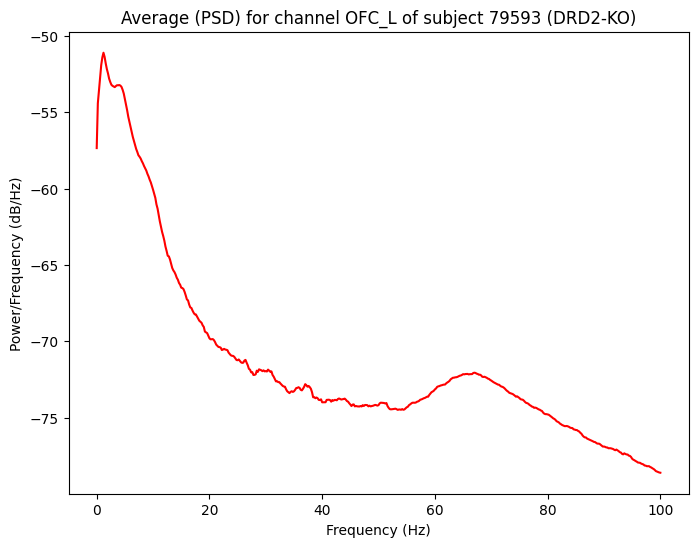

In [93]:
# try for one subject
subject = 79593
channel_of_interest = "OFC_L"
data = df[df.subject_id == subject]
data = data[data.channel == channel_of_interest]
freqs = data.freq
mean_psd = data["psd (means)"]
genotype = data.genotype.iloc[0]

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(freqs, 10 * np.log10(mean_psd), label='Average PSD', color='r')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power/Frequency (dB/Hz)')
ax.set_title(f'Average (PSD) for channel {channel_of_interest} of subject {subject} ({genotype})')

In [94]:
data_ko = df[df.genotype == "DRD2-KO"]  # grab the KO subjects
data_wt = df[df.genotype == "DRD2-WT"]  # grab the WT subjects
print(f"Shapes of data_ko and data_wt respectively: {data_ko.shape}, {data_wt.shape}")  # report shapes
print(f"For DRD2-KO, there are {len(data_ko.channel.value_counts())} channels in the dataframe and {len(data_ko.subject_id.value_counts())} subjects.")
print(f"For DRD2-WT, there are {len(data_wt.channel.value_counts())} channels in the dataframe and {len(data_wt.subject_id.value_counts())} subjects.")

# group by the channel and the index of the dataframe (ranging from 0 through 500 for channel of each subject)
averaged_ko = data_ko.groupby(['channel', data_ko.index], as_index=False).agg({'freq': 'first', 'psd (means)': 'mean', 'genotype': 'first', 'channel': 'first'})
averaged_wt = data_wt.groupby(['channel', data_wt.index], as_index=False).agg({'freq': 'first', 'psd (means)': 'mean', 'genotype': 'first', 'channel': 'first'})

Shapes of data_ko and data_wt respectively: (35070, 5), (28056, 5)
For DRD2-KO, there are 7 channels in the dataframe and 10 subjects.
For DRD2-WT, there are 7 channels in the dataframe and 8 subjects.


/var/folders/rf/xrxwkkr96qq6kyy5jfx9hvgw0000gn/T/ipykernel_16435/937053201.py:8: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  averaged_ko = data_ko.groupby(['channel', data_ko.index], as_index=False).agg({'freq': 'first', 'psd (means)': 'mean', 'genotype': 'first', 'channel': 'first'})
/var/folders/rf/xrxwkkr96qq6kyy5jfx9hvgw0000gn/T/ipykernel_16435/937053201.py:9: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  averaged_wt = data_wt.groupby(['channel', data_wt.index], as_index=False).agg({'freq': 'first', 'psd (means)': 'mean', 'genotype': 'first', 'channel': 'first'})


In [95]:
averaged_ko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   freq         3507 non-null   float64
 1   psd (means)  3507 non-null   float64
 2   genotype     3507 non-null   object 
 3   channel      3507 non-null   object 
dtypes: float64(2), object(2)
memory usage: 109.7+ KB


The averaged_ko dataframe contains the averaged PSD of all DRD2-KO subjects for each channel. The averaged_wt dataframe the same but for the DRD2-WT subjects.

Let's try to, for both genotypes, plot the data per channel in one figure.

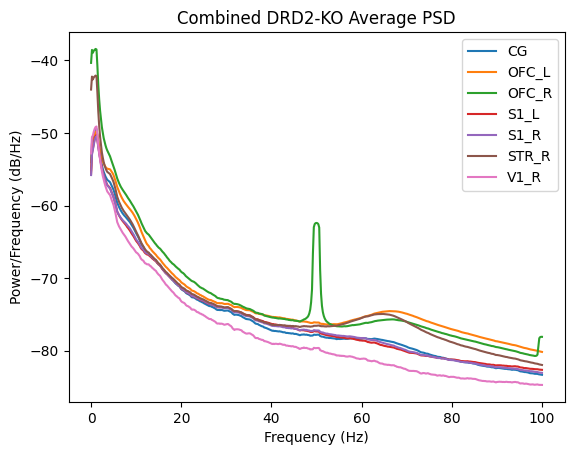

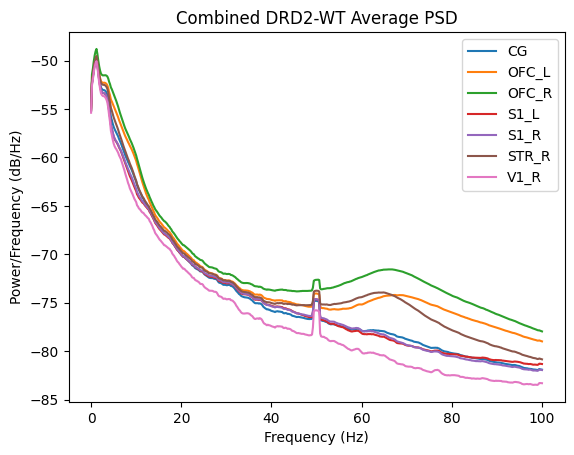

In [100]:
for genotype, data in {"DRD2-KO": averaged_ko, "DRD2-WT": averaged_wt}.items():
    for channel in np.unique(data.channel):
        data_subset = data[data.channel == channel]
        freqs = data_subset.freq
        mean_psd = data_subset["psd (means)"]
        converted_psd = 10 * np.log10(mean_psd)  # transform to decibels?
    
        plt.plot(freqs, converted_psd, label=channel)
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.title(f'Combined {genotype} Average PSD')
    plt.legend()
    plt.show()

Perhaps it's more intuitive to compare the traces of the channels between the two genotypes instead. Let's try that.

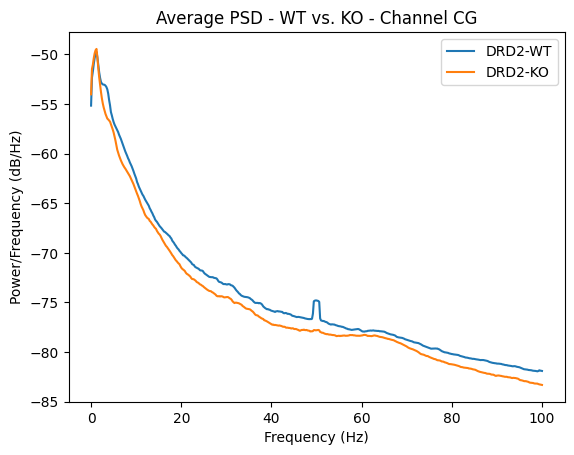

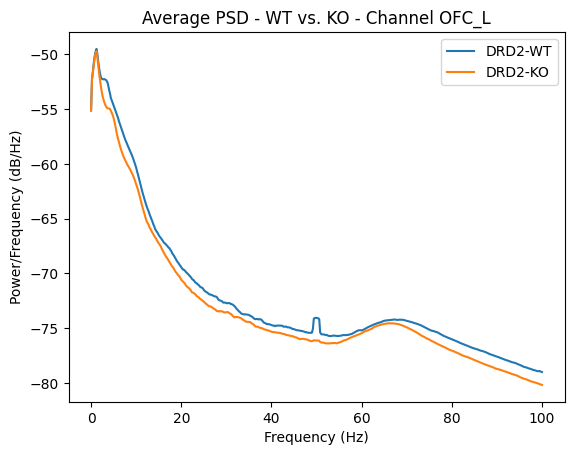

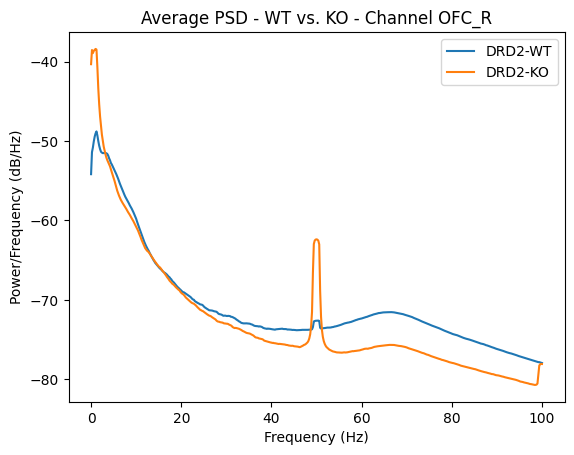

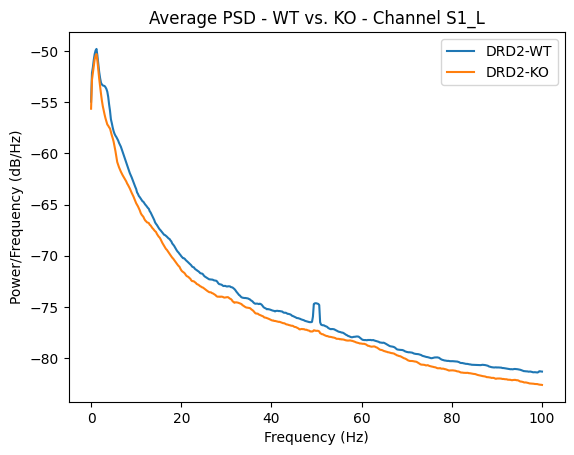

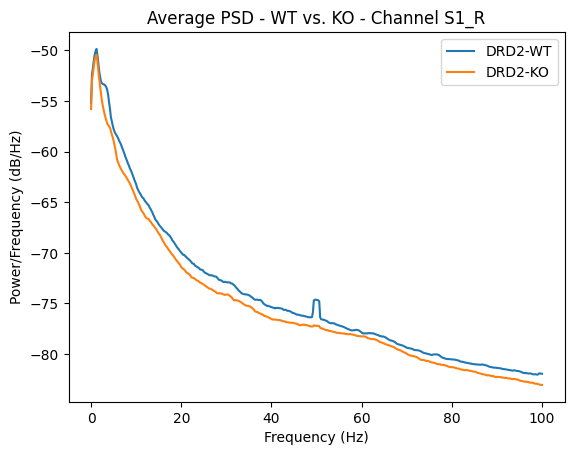

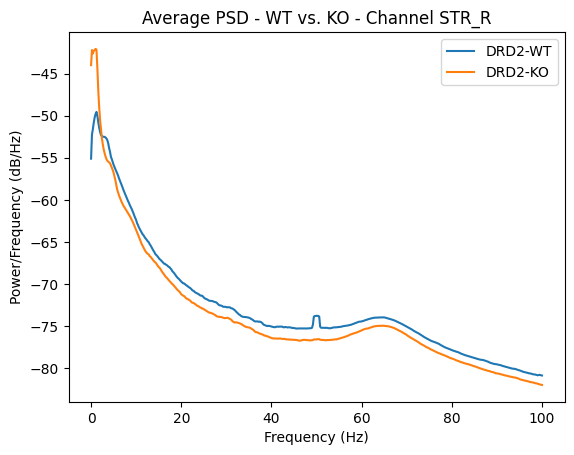

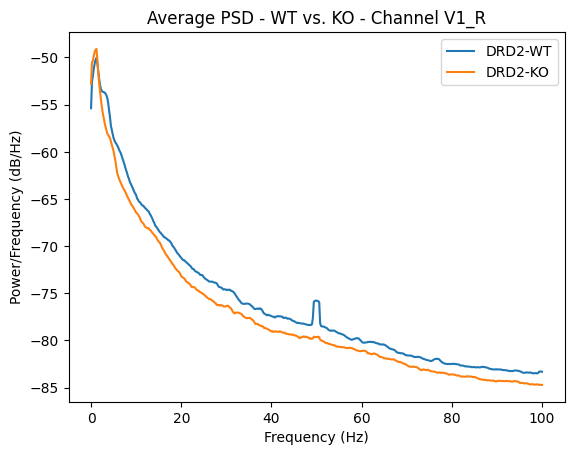

In [101]:
unique_channels = np.unique(averaged_ko.channel)
for channel in unique_channels:
    data_subset_wt = averaged_wt[averaged_wt.channel == channel]
    data_subset_ko = averaged_ko[averaged_ko.channel == channel]

    freqs_wt = data_subset_wt.freq
    freqs_ko = data_subset_ko.freq
    
    mean_psd_wt = data_subset_wt["psd (means)"]
    mean_psd_ko = data_subset_ko["psd (means)"]
    
    converted_psd_wt = 10 * np.log10(mean_psd_wt)  # transform to decibels?
    converted_psd_ko = 10 * np.log10(mean_psd_ko)

    plt.plot(freqs_wt, converted_psd_wt, label='DRD2-WT')
    plt.plot(freqs_ko, converted_psd_ko, label='DRD2-KO')
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.title(f'Average PSD - WT vs. KO - Channel {channel}')
    plt.legend()
    plt.show()